In [10]:
!pip install konlpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

import plotly.graph_objs as go
import plotly.express as px

palette_redwhite = ['#ffffff', '#ff0000']

#경고 무시
import warnings
warnings.filterwarnings(action='ignore')

!pip install bertopic
!pip install bertopic[visualization]
!pip install pandas sentence-transformers bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
final = pd.read_excel('/content/drive/MyDrive/한국정보과학회-2023/최종 데이터(수정).xlsx')
final = final.dropna()
final.reset_index(drop = True, inplace = True)
final.head()

,Unnamed: 0,호기,부위,일자,시작시간,완료시간,정지시간(분),정지시간(시간),고장 원인,처리 내용,risk_impact,risk_likehood,위험도 수준,위험도 등급
0,0,1호기,압출기,3월28일,18:00:00,18:40:00,40.0,0.67,메인 및 부스타 펌프 트립,작업자 부주위로 노커 케이불 누전,3.426264,15.0,저,5
1,1,1호기,압출기,4월11일,13:45:00,17:17:00,212.0,3.53,콘테이너 메인배관 불럭,풀렌지 볼트 전단 씰 및 볼트 교체,3.426264,15.0,저,5
2,2,1호기,압출기,4월11일,08:30:00,10:43:00,133.0,2.22,빌레트 로더 기계와 추돌,로 인한 피다 휨 교정 작업,3.426264,15.0,저,5
3,3,1호기,압출기,6월23일,10:44:00,12:30:00,106.0,1.77,콘테이너 실린다 고정,실린다 원 위치 조정 작업,3.426264,15.0,저,5
4,4,1호기,압출기,8월13일,01:00:00,01:30:00,30.0,0.50,빌레트 로더 전/후진시 소음 발생,테이너 센터 틀려 조정 작업,3.426264,15.0,저,5


# 고장 원인 BERTopic: 한글 그대로

In [11]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

In [8]:
# 형태소 분석기 초기화
okt = Okt()

# 데이터 전처리
def preprocess_text(text):
    tokens = okt.morphs(text)  # 형태소 분석
    preprocessed_text = " ".join(tokens)  # 형태소로 분리된 텍스트를 다시 문자열로 결합
    return preprocessed_text

In [10]:
final["preprocessed_text"] = final["고장 원인"].apply(preprocess_text)

In [11]:
model = SentenceTransformer("distilbert-base-nli-mean-tokens")

In [12]:
# BERTopic 모델 초기화 및 학습
topic_model = BERTopic(language="korean", embedding_model=model)
topics, _ = topic_model.fit_transform(final["preprocessed_text"])

In [13]:
# 토픽 추출 결과 확인
topic_model.get_topic_freq().head(20)

,Topic,Count
0,-1,235
1,0,92
2,1,58
3,2,51
4,3,45
5,4,41
6,5,30
7,6,30
8,7,28
9,8,26


In [14]:
topic_model.visualize_topics()

In [15]:
topic_model.visualize_barchart()

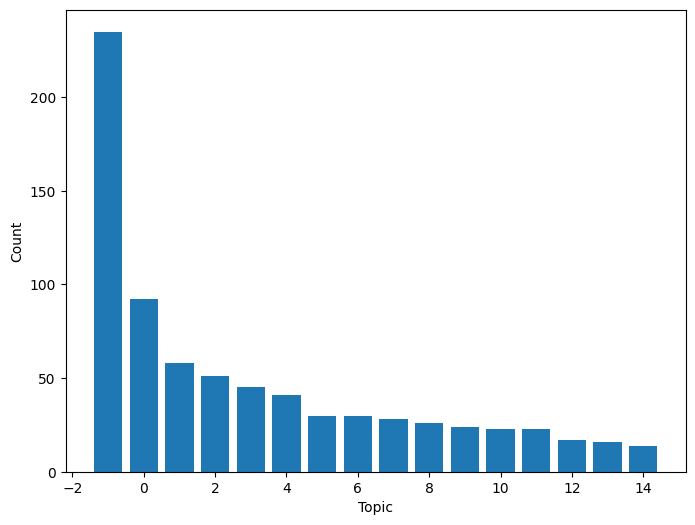

In [16]:
#토픽 별 분포
topic_freq = topic_model.get_topic_freq()
plt.figure(figsize=(8, 6))
plt.bar(topic_freq["Topic"], topic_freq["Count"])
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()

In [ ]:
#Topic별 heatmap
topic_model.visualize_heatmap()

# 고장원인 BERTopic: 영어로 변환

In [17]:
!pip uninstall googletrans
!pip install googletrans==3.1.0a0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=e46faa66a0c97a26628438827e9facc9ab504a94c46250bf304836063c10c581
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans


In [1]:
import googletrans
translator = googletrans.Translator()

In [2]:
# 번역 함수
def translate_text(text):
    try:
        translation = translator.translate(text, src='ko', dest='en')
        translated_text = translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        translated_text = ""
    return translated_text

In [8]:
final["translated"] = final["고장 원인"].apply(translate_text)
final.head()

,Unnamed: 0,호기,부위,일자,시작시간,완료시간,정지시간(분),정지시간(시간),고장 원인,처리 내용,risk_impact,risk_likehood,위험도 수준,위험도 등급,translated
0,0,1호기,압출기,3월28일,18:00:00,18:40:00,40.0,0.67,메인 및 부스타 펌프 트립,작업자 부주위로 노커 케이불 누전,3.426264,15.0,저,5,Main and booster pump trip
1,1,1호기,압출기,4월11일,13:45:00,17:17:00,212.0,3.53,콘테이너 메인배관 불럭,풀렌지 볼트 전단 씰 및 볼트 교체,3.426264,15.0,저,5,Container main piping block
2,2,1호기,압출기,4월11일,08:30:00,10:43:00,133.0,2.22,빌레트 로더 기계와 추돌,로 인한 피다 휨 교정 작업,3.426264,15.0,저,5,Collision with billet loader machine
3,3,1호기,압출기,6월23일,10:44:00,12:30:00,106.0,1.77,콘테이너 실린다 고정,실린다 원 위치 조정 작업,3.426264,15.0,저,5,fix container cylinder
4,4,1호기,압출기,8월13일,01:00:00,01:30:00,30.0,0.50,빌레트 로더 전/후진시 소음 발생,테이너 센터 틀려 조정 작업,3.426264,15.0,저,5,Noise occurs when the billet loader moves forw...


In [12]:
model = SentenceTransformer("distilbert-base-nli-mean-tokens")

In [15]:
topic_model = BERTopic(language="english", embedding_model=model)
topics, _ = topic_model.fit_transform(final["translated"])

In [16]:
# 토픽 추출 결과 확인
topic_model.get_topic_freq().head(20)

,Topic,Count
0,-1,167
1,0,151
2,1,122
3,2,78
4,3,44
5,4,26
6,5,26
7,6,23
8,7,20
9,8,20


In [17]:
topic_model.visualize_topics()

In [18]:
topic_model.visualize_barchart()

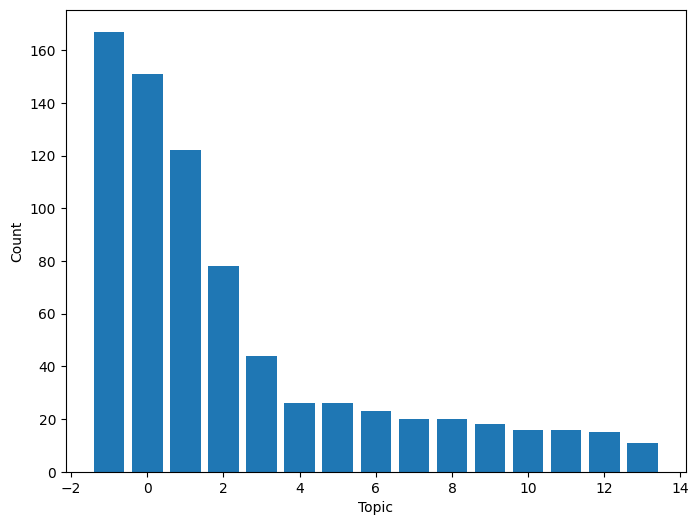

In [19]:
topic_freq = topic_model.get_topic_freq()
plt.figure(figsize=(8, 6))
plt.bar(topic_freq["Topic"], topic_freq["Count"])
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()

In [20]:
#Topic별 heatmap
topic_model.visualize_heatmap()